# **Mini Projects [Python]: Visualizing Nobel Prize Winners by Gender and Birth Country**

### **Executive Summary**

The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv`.

### **Business Question and Objectives**

1. Which Gender and Birth Country Dominate Nobel Prize Awards?
2. Who Was the Trailblazing Woman to Claim a Nobel Prize?
3. Who Are the Distinguished Repeat Winners of the Nobel Prize?

### **Technique Used**
- Data Loading: Importing the necessary libraries and reading the Nobel Prize dataset.
- Data Analysis: Counting occurrences to identify the most commonly awarded gender and birth country.
- Data Storage: Storing the results in variables for further use and display.
- Output Display: Printing the results to provide insights into the Nobel laureates' demographics.


### **Key Findings**


1. **Dominant Gender Among Nobel Laureates**
The analysis reveals that the gender with the most Nobel laureates is Male. This highlights a significant gender disparity in Nobel Prize awards over the years.

2. **Most Common Birth Country**
The most frequently represented birth country among Nobel laureates is the United States of America. This indicates a strong presence of American recipients in the Nobel Prize history.

3. **Pioneering Female Laureate**
The first woman to win a Nobel Prize was Marie Curie, who received the award in the category of Physics. Her achievement marks a significant milestone in the recognition of women in science.

4. **Notable Repeat Winners**
The following individuals and organizations have been recognized as repeat winners of the Nobel Prize:
- Comité international de la Croix Rouge (International Committee of the Red Cross)
- Linus Carl Pauling
- John Bardeen
- Frederick Sanger
- Marie Curie, née Sklodowska
- Office of the United Nations High Commissioner for Refugees (UNHCR)

### **Import and Read the Dataset**

In [13]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Read in the Nobel Prize data
nobel = pd.read_csv('nobel.csv')

### **To address the question of which gender and birth country are most prevalent among Nobel Prize recipients**

In [2]:
# Store and display the most commonly awarded gender and birth country in requested variables
top_gender = nobel['sex'].value_counts().index[0]
top_country = nobel['birth_country'].value_counts().index[0]

print("\n The gender with the most Nobel laureates is :", top_gender)
print(" The most common birth country of Nobel laureates is :", top_country)


 The gender with the most Nobel laureates is : Male
 The most common birth country of Nobel laureates is : United States of America


In [3]:
# Calculate the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].mean()

In [4]:
# Identify the decade with the highest proportion of US-born winners
max_decade_usa = prop_usa_winners[prop_usa_winners['usa_born_winner'] == prop_usa_winners['usa_born_winner'].max()]['decade'].values[0]

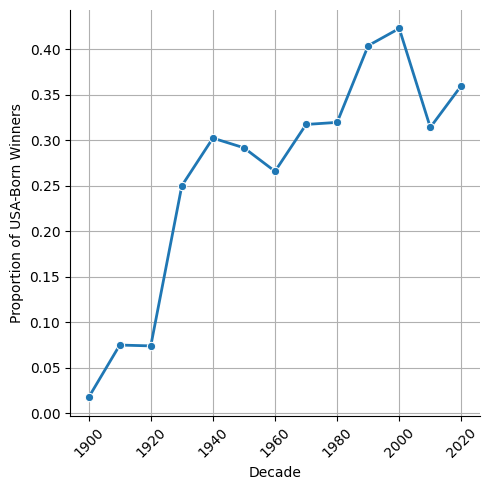

In [14]:
# Plotting USA Winners
ax1 = sns.relplot(x='decade', y='usa_born_winner', data=prop_usa_winners, kind="line", marker='o', linewidth=2)

# Adding titles and labels
ax1.set_titles("Proportion of USA-Born Nobel Winners Over Decades")
ax1.set_axis_labels("Decade", "Proportion of USA-Born Winners")

# Customizing the appearance
plt.xticks(rotation=45) 
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

### **To uncover the identity of the pioneering woman who first received a Nobel Prize**

In [6]:
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel['sex'] == 'Female'
prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

In [7]:
# Find the decade and category with the highest proportion of female laureates
max_female_decade_category = prop_female_winners[prop_female_winners['female_winner'] == prop_female_winners['female_winner'].max()][['decade', 'category']]

In [8]:
# Create a dictionary with the decade and category pair
max_female_dict = {max_female_decade_category['decade'].values[0]: max_female_decade_category['category'].values[0]}


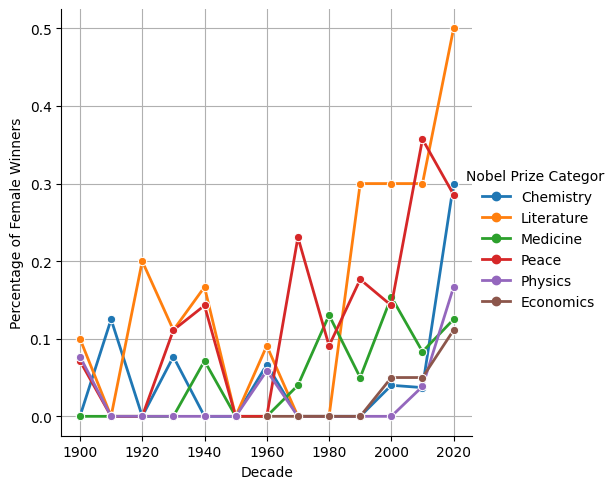

In [23]:
# Plotting female winners with % winners on the y-axis
ax2 = sns.relplot(x='decade', y='female_winner', hue='category', data=prop_female_winners, kind="line", marker='o', linewidth=2)

# Adding titles and labels
ax2.set_titles("Percentage of Female Nobel Prize Winners by Category Over Decades")
ax2.set_axis_labels("Decade", "Percentage of Female Winners")

# Customizing the legend
ax2._legend.set_title("Nobel Prize Category")
plt.setp(ax2._legend.get_texts(), fontsize='10')
ax2._legend.set_bbox_to_anchor((1, 0.5))

# Adding a grid for better readability
plt.grid(True)

# Show the plot
plt.show()

### **To identify the notable individuals who have achieved the distinction of winning the Nobel Prize multiple times**

In [10]:
# Finding the first woman to win a Nobel Prize
nobel_women = nobel[nobel['female_winner']]
min_row = nobel_women[nobel_women['year'] == nobel_women['year'].min()]
first_woman_name = min_row['full_name'].values[0]
first_woman_category = min_row['category'].values[0]
print(f"\n The first woman to win a Nobel Prize was {first_woman_name}, in the category of {first_woman_category}.")


 The first woman to win a Nobel Prize was Marie Curie, née Sklodowska, in the category of Physics.


In [11]:
# Selecting the laureates that have received 2 or more prizes
counts = nobel['full_name'].value_counts()
repeats = counts[counts >= 2].index
repeat_list = list(repeats)

print("\n The repeat winners are :", repeat_list)


 The repeat winners are : ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
